In [1]:
import pandas as pd
import yfinance as yf


In [2]:
start_date = '2020-01-01'
end_date = '2021-01-01'

In [3]:
data = yf.download('NVDA',start= start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.770550,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.813869,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.060516,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.775528,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.887650,27710800
...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.702805,9788400
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.767029,21256400
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198746,17037200


In [5]:
 data = data.iloc[:,:4]

In [6]:
data

,Open,High,Low,Close
Date,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501
2020-01-03,58.775002,59.457500,58.525002,59.017502
2020-01-06,58.080002,59.317501,57.817501,59.264999
2020-01-07,59.549999,60.442501,59.097500,59.982498
2020-01-08,59.939999,60.509998,59.537498,60.095001
...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500
2020-12-28,130.625000,130.625000,127.632500,129.000000
2020-12-29,129.250000,130.725006,128.422501,129.432495


In [9]:
data['gain'] = data.Close - data.Close.shift(1) 
data['loss'] = data.Close - data.Close.shift(1) 
# this is old way to clean data to 0 the new way is use mask function of pandas
data.loc[(data.gain < 0),'gain'] = 0
data.loc[(data.loss > 0),'loss'] = 0

In [10]:
data

,Open,High,Low,Close,gain,loss
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000
...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000


In [11]:
# this is new way to clean data 

In [12]:
next_Close = data.Close - data.Close.shift(1) 
data['gain']=next_Close.mask(next_Close < 0,0)
data['loss']= next_Close.mask(next_Close>0,0)

In [13]:
data

,Open,High,Low,Close,gain,loss
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000
...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000


In [14]:
# avg gain,loss = sma gain and loss
data['avg_gain']=data.gain.rolling(14).mean()
data['avg_loss']=abs(data.loss.rolling(14).mean())

In [15]:
data

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss
Date,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN,NaN,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999,NaN,NaN
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000,NaN,NaN
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000,NaN,NaN
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999,0.455178,0.858393
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500,0.420535,0.925357
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000,0.451428,0.741964


In [16]:
rs= data.avg_gain - data.avg_loss

In [21]:
rs

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2020-12-24   -0.403215
2020-12-28   -0.504822
2020-12-29   -0.290536
2020-12-30    0.153572
2020-12-31    0.059107
Length: 253, dtype: float64

In [17]:
rsi = 100-(100/(1+rs))

In [18]:
data['rsi']=rsi

In [19]:
data

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi
Date,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN,NaN,NaN,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999,NaN,NaN,NaN
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000,NaN,NaN,NaN
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000,NaN,NaN,NaN
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999,0.455178,0.858393,-67.564418
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500,0.420535,0.925357,-101.947492
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000,0.451428,0.741964,-40.951491


In [20]:
data[data.rsi.notnull()]

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi
Date,,,,,,,,,
2020-01-23,62.930000,63.299999,62.037498,63.215000,0.687500,0.000000,0.438214,0.206964,18.781722
2020-01-24,64.375000,64.875000,62.075001,62.619999,0.000000,-0.595001,0.438214,0.180893,20.465830
2020-01-27,59.560001,60.562500,58.057499,60.049999,0.000000,-2.570000,0.420535,0.364464,5.309434
2020-01-28,60.712502,62.317501,60.177502,61.992500,1.942501,0.000000,0.508036,0.364464,12.554665
2020-01-29,61.847500,62.209999,60.985001,61.384998,0.000000,-0.607502,0.500000,0.407857,8.436869
...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999,0.455178,0.858393,-67.564418
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500,0.420535,0.925357,-101.947492
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000,0.451428,0.741964,-40.951491


In [22]:
### fix code 
def rsi_func(df, days=14,lower=30,upper=70):
    chg = df['Close'].diff(1)
    
    gain = chg.mask(chg<0,0) #if chg < 0 then value = 0 
    loss = chg.mask(chg>0,0)  #if chg > 0 then value = 0 
    avg_gain = gain.rolling(days).mean()  #by default min_periods = window
    avg_loss = abs(loss.rolling(days).mean()) #by default min_periods = window
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1+rs))
    df['rsi'] = rsi
    
    
    #Find action zone

    df.loc[(df['rsi'] > upper), 'action'] = 'sell'
    df.loc[(df['rsi'] < lower), 'action'] = 'buy'
    df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.98
    df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02

    return df

In [23]:
rsi_starter = rsi_func(data, days=14)

In [24]:
rsi_starter[rsi_starter.action.notnull()].head()

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position
Date,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,0.000000,-0.595001,0.438214,0.180893,70.781658,sell,66.172500
2020-02-14,71.815002,73.742500,71.500000,72.447502,4.752502,0.000000,1.175358,0.289822,80.219362,sell,75.217350
2020-02-18,71.410004,74.327499,71.214996,74.142502,1.695000,0.000000,1.157679,0.289822,79.977776,sell,75.814049
2020-02-19,75.372498,78.852501,75.372498,78.675003,4.532501,0.000000,1.481429,0.246429,85.737897,sell,80.429551
2020-02-20,78.192497,79.080002,74.087502,77.175003,0.000000,-1.500000,1.476608,0.353572,80.681034,sell,80.661602


In [25]:
!pip install mplfinance

In [26]:
import mplfinance as mpf
def rsi_plot(df_plot,lower=30,mid=50,upper=70):
    df=rsi_func(df_plot)
    
    df['lower'] = lower
    df['upper'] = upper
    df['mid'] = mid
    rsi_ylim = (0,100)
    
    # for plot rsi
    mpf_rsi = mpf.make_addplot(df['rsi'],panel=1,color = 'blue',title='RSI' ,ylim=rsi_ylim)
    mpf_lower = mpf.make_addplot(df['lower'], panel = 1, color='red', ylim=rsi_ylim)
    mpf_upper = mpf.make_addplot(df['upper'], panel = 1, color='green', ylim=rsi_ylim)
    mpf_mid = mpf.make_addplot(df['mid'], panel = 1, color='gray', ylim=rsi_ylim)
    
     # for marker
    markers = ['^' if x == 'buy' else 'v' for x in df['action']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
    plot_signal = mpf.make_addplot(df['marker_position'], type='scatter', marker=markers, color=color_marker)
    plots = [mpf_rsi, mpf_lower, mpf_mid ,mpf_upper,plot_signal]
    
    return plots

In [27]:
rsi_to_plot = rsi_plot(data)

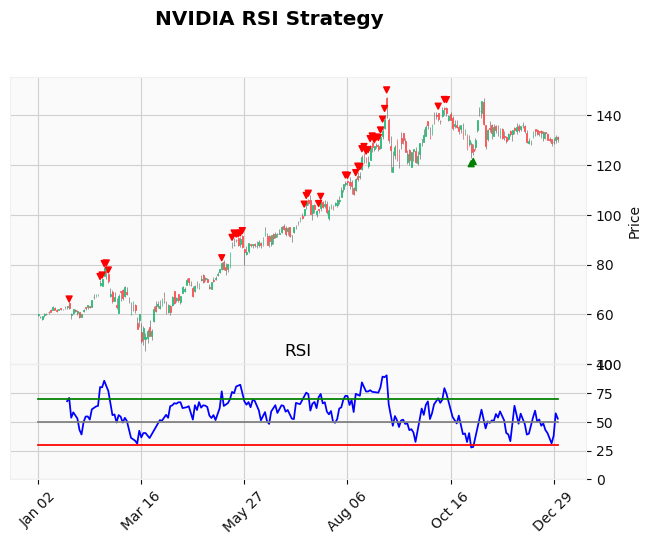

In [28]:
mpf.plot(data,type='candle',style='yahoo',addplot=rsi_to_plot,title = ' NVIDIA RSI Strategy')

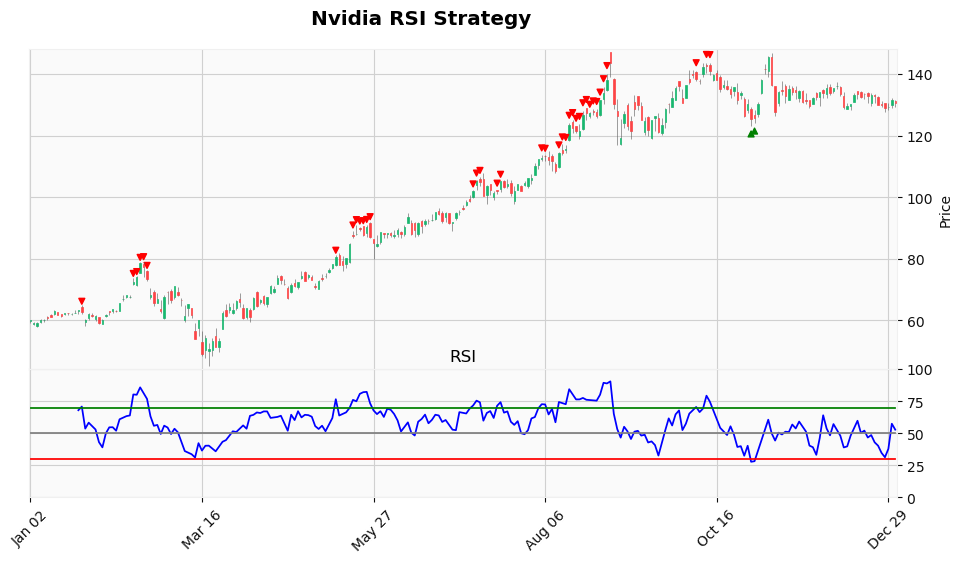

In [29]:
# fix graph visulization ratio
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
              title='Nvidia RSI Strategy',
              figsize = (10,6),panel_ratios =(1,0.4),
              tight_layout=True, scale_padding ={'top':5})

In [30]:
# change value rsi lower mid upper
# lower 35 mid 52 upper 75

rsi_starter = rsi_func(data,days=14,lower=35,upper=75)
rsi_to_plot = rsi_plot(data,lower=35,mid=52,upper=75)

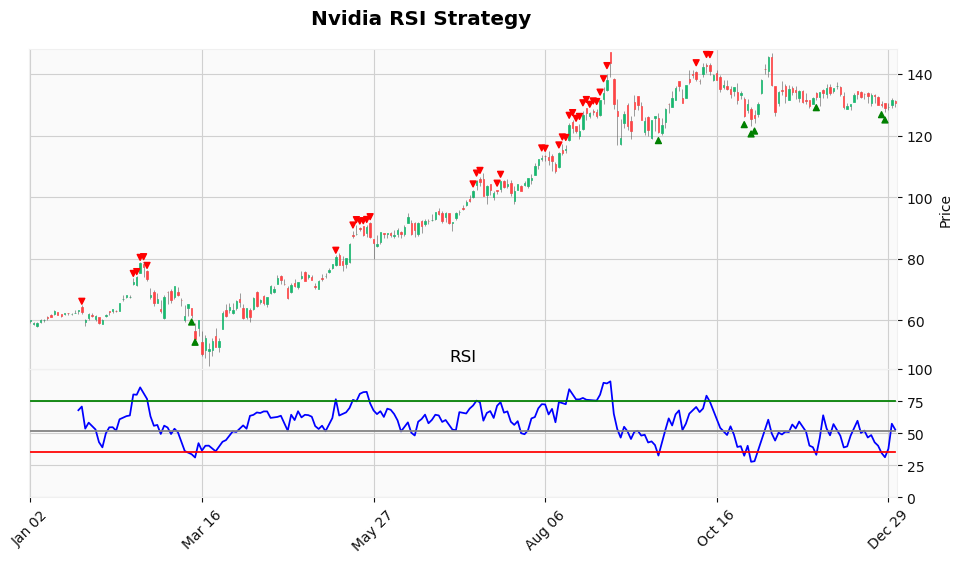

In [31]:
mpf.plot(data, type='candle', style='yahoo', addplot=rsi_to_plot,
              title='Nvidia RSI Strategy',
              figsize = (10,6),panel_ratios =(1,0.4),
              tight_layout=True, scale_padding ={'top':5})

In [32]:
# action is not signal let create real signal
action_data = data.copy()

In [33]:
action_data

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid
Date,,,,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,75,52
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999,NaN,NaN,NaN,NaN,NaN,35,75,52
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,0.000000,-0.154999,0.455178,0.858393,34.651973,buy,126.799747,35,75,52
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.000000,-0.937500,0.420535,0.925357,31.245840,buy,125.079850,35,75,52
2020-12-29,129.250000,130.725006,128.422501,129.432495,0.432495,0.000000,0.451428,0.741964,37.827300,NaN,NaN,35,75,52


In [34]:
action_data['action_price'] = action_data['Open'].shift(-1)

In [35]:
action_data.head()

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,75,52,58.775002
2020-01-03,58.775002,59.457500,58.525002,59.017502,0.000000,-0.959999,NaN,NaN,NaN,NaN,NaN,35,75,52,58.080002
2020-01-06,58.080002,59.317501,57.817501,59.264999,0.247498,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52,59.549999
2020-01-07,59.549999,60.442501,59.097500,59.982498,0.717499,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52,59.939999
2020-01-08,59.939999,60.509998,59.537498,60.095001,0.112503,0.000000,NaN,NaN,NaN,NaN,NaN,35,75,52,60.962502


In [36]:
record = action_data[action_data.action.notnull()]


In [37]:
record

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,0.000000,-0.595001,0.438214,0.180893,70.781658,sell,66.172500,35,75,52,59.560001
2020-02-14,71.815002,73.742500,71.500000,72.447502,4.752502,0.000000,1.175358,0.289822,80.219362,sell,75.217350,35,75,52,71.410004
2020-02-18,71.410004,74.327499,71.214996,74.142502,1.695000,0.000000,1.157679,0.289822,79.977776,sell,75.814049,35,75,52,75.372498
2020-02-19,75.372498,78.852501,75.372498,78.675003,4.532501,0.000000,1.481429,0.246429,85.737897,sell,80.429551,35,75,52,78.192497
2020-02-20,78.192497,79.080002,74.087502,77.175003,0.000000,-1.500000,1.476608,0.353572,80.681034,sell,80.661602,35,75,52,76.047501
2020-02-21,76.047501,76.300003,72.665001,73.517502,0.000000,-3.657501,1.476608,0.447322,76.749576,sell,77.826003,35,75,52,67.547501
2020-03-11,63.865002,64.150002,60.642502,61.617500,0.000000,-3.652496,1.137321,2.248571,33.589994,buy,59.429652,35,75,52,56.365002
2020-03-12,56.365002,59.029999,53.950001,54.077499,0.000000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000
2020-05-11,78.074997,81.125000,77.787498,80.654999,2.529999,0.000000,1.368749,0.420357,76.504649,sell,82.747500,35,75,52,81.235001


In [38]:
record['helper'] = record.action.shift(-1)
record

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_45898/2114248699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['helper'] = record.action.shift(-1)


,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,0.000000,-0.595001,0.438214,0.180893,70.781658,sell,66.172500,35,75,52,59.560001,sell
2020-02-14,71.815002,73.742500,71.500000,72.447502,4.752502,0.000000,1.175358,0.289822,80.219362,sell,75.217350,35,75,52,71.410004,sell
2020-02-18,71.410004,74.327499,71.214996,74.142502,1.695000,0.000000,1.157679,0.289822,79.977776,sell,75.814049,35,75,52,75.372498,sell
2020-02-19,75.372498,78.852501,75.372498,78.675003,4.532501,0.000000,1.481429,0.246429,85.737897,sell,80.429551,35,75,52,78.192497,sell
2020-02-20,78.192497,79.080002,74.087502,77.175003,0.000000,-1.500000,1.476608,0.353572,80.681034,sell,80.661602,35,75,52,76.047501,sell
2020-02-21,76.047501,76.300003,72.665001,73.517502,0.000000,-3.657501,1.476608,0.447322,76.749576,sell,77.826003,35,75,52,67.547501,buy
2020-03-11,63.865002,64.150002,60.642502,61.617500,0.000000,-3.652496,1.137321,2.248571,33.589994,buy,59.429652,35,75,52,56.365002,buy
2020-03-12,56.365002,59.029999,53.950001,54.077499,0.000000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000,sell
2020-05-11,78.074997,81.125000,77.787498,80.654999,2.529999,0.000000,1.368749,0.420357,76.504649,sell,82.747500,35,75,52,81.235001,sell


In [39]:
record= record.loc[record['helper']!=record['action']]

In [40]:
record

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,,,
2020-02-21,76.047501,76.300003,72.665001,73.517502,0.00000,-3.657501,1.476608,0.447322,76.749576,sell,77.826003,35,75,52,67.547501,buy
2020-03-12,56.365002,59.029999,53.950001,54.077499,0.00000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000,sell
2020-09-02,147.037506,147.267502,139.000000,143.464996,5.25499,0.000000,2.319107,0.245179,90.438711,sell,150.212852,35,75,52,138.287506,buy
2020-09-23,125.754997,127.269997,120.792503,121.237503,0.00000,-5.139999,1.483572,3.071250,32.571461,buy,118.376653,35,75,52,120.722504,sell
2020-10-14,142.904999,143.427505,139.600006,140.952499,0.00000,-1.529999,1.895536,0.647500,74.538299,sell,146.296056,35,75,52,138.107498,buy
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.00000,-0.937500,0.420535,0.925357,31.245840,buy,125.079850,35,75,52,129.250000,NaN


In [41]:
record = record.iloc[1:]

In [42]:
record

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,0.00000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000,sell
2020-09-02,147.037506,147.267502,139.000000,143.464996,5.25499,0.000000,2.319107,0.245179,90.438711,sell,150.212852,35,75,52,138.287506,buy
2020-09-23,125.754997,127.269997,120.792503,121.237503,0.00000,-5.139999,1.483572,3.071250,32.571461,buy,118.376653,35,75,52,120.722504,sell
2020-10-14,142.904999,143.427505,139.600006,140.952499,0.00000,-1.529999,1.895536,0.647500,74.538299,sell,146.296056,35,75,52,138.107498,buy
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.00000,-0.937500,0.420535,0.925357,31.245840,buy,125.079850,35,75,52,129.250000,NaN


In [43]:
record['return'] = record['action_price'].pct_change()

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_45898/2348773325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['return'] = record['action_price'].pct_change()


In [44]:
record

,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price,helper,return
Date,,,,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,0.00000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000,sell,NaN
2020-09-02,147.037506,147.267502,139.000000,143.464996,5.25499,0.000000,2.319107,0.245179,90.438711,sell,150.212852,35,75,52,138.287506,buy,1.399783
2020-09-23,125.754997,127.269997,120.792503,121.237503,0.00000,-5.139999,1.483572,3.071250,32.571461,buy,118.376653,35,75,52,120.722504,sell,-0.127018
2020-10-14,142.904999,143.427505,139.600006,140.952499,0.00000,-1.529999,1.895536,0.647500,74.538299,sell,146.296056,35,75,52,138.107498,buy,0.144008
2020-12-28,130.625000,130.625000,127.632500,129.000000,0.00000,-0.937500,0.420535,0.925357,31.245840,buy,125.079850,35,75,52,129.250000,NaN,-0.064135


In [45]:
record.reset_index(inplace=True)

In [46]:
record

,Date,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,action,marker_position,lower,upper,mid,action_price,helper,return
0,2020-03-12,56.365002,59.029999,53.950001,54.077499,0.00000,-7.540001,1.137321,2.525893,31.047083,buy,52.871001,35,75,52,57.625000,sell,NaN
1,2020-09-02,147.037506,147.267502,139.000000,143.464996,5.25499,0.000000,2.319107,0.245179,90.438711,sell,150.212852,35,75,52,138.287506,buy,1.399783
2,2020-09-23,125.754997,127.269997,120.792503,121.237503,0.00000,-5.139999,1.483572,3.071250,32.571461,buy,118.376653,35,75,52,120.722504,sell,-0.127018
3,2020-10-14,142.904999,143.427505,139.600006,140.952499,0.00000,-1.529999,1.895536,0.647500,74.538299,sell,146.296056,35,75,52,138.107498,buy,0.144008
4,2020-12-28,130.625000,130.625000,127.632500,129.000000,0.00000,-0.937500,0.420535,0.925357,31.245840,buy,125.079850,35,75,52,129.250000,NaN,-0.064135


In [47]:
record['previous_sig_date'] = record['Date'].shift(1)
record['previous_action'] = record['action'].shift(1)
record['previous_act_price'] = record['action_price'].shift(1)
record.rename(columns={'Date':'today_sig_date'}, inplace=True)

record

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_45898/2179031657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['previous_sig_date'] = record['Date'].shift(1)
/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_45898/2179031657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['previous_action'] = record['action'].shift(1)
/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_45898/2179031657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,today_sig_date,Open,High,Low,Close,gain,loss,avg_gain,avg_loss,rsi,...,marker_position,lower,upper,mid,action_price,helper,return,previous_sig_date,previous_action,previous_act_price
0,2020-03-12,56.365002,59.029999,53.950001,54.077499,0.00000,-7.540001,1.137321,2.525893,31.047083,...,52.871001,35,75,52,57.625000,sell,NaN,NaT,NaN,NaN
1,2020-09-02,147.037506,147.267502,139.000000,143.464996,5.25499,0.000000,2.319107,0.245179,90.438711,...,150.212852,35,75,52,138.287506,buy,1.399783,2020-03-12,buy,57.625000
2,2020-09-23,125.754997,127.269997,120.792503,121.237503,0.00000,-5.139999,1.483572,3.071250,32.571461,...,118.376653,35,75,52,120.722504,sell,-0.127018,2020-09-02,sell,138.287506
3,2020-10-14,142.904999,143.427505,139.600006,140.952499,0.00000,-1.529999,1.895536,0.647500,74.538299,...,146.296056,35,75,52,138.107498,buy,0.144008,2020-09-23,buy,120.722504
4,2020-12-28,130.625000,130.625000,127.632500,129.000000,0.00000,-0.937500,0.420535,0.925357,31.245840,...,125.079850,35,75,52,129.250000,NaN,-0.064135,2020-10-14,sell,138.107498


In [48]:
record = record[['action','today_sig_date','action_price','return','previous_sig_date','previous_action','previous_act_price']]

In [49]:
# the reason why profit is only pick by sell because we select buy at first of rsi strategy
profit = record[record.action == 'sell']

In [50]:
profit

,action,today_sig_date,action_price,return,previous_sig_date,previous_action,previous_act_price
1,sell,2020-09-02,138.287506,1.399783,2020-03-12,buy,57.625000
3,sell,2020-10-14,138.107498,0.144008,2020-09-23,buy,120.722504


<AxesSubplot:>

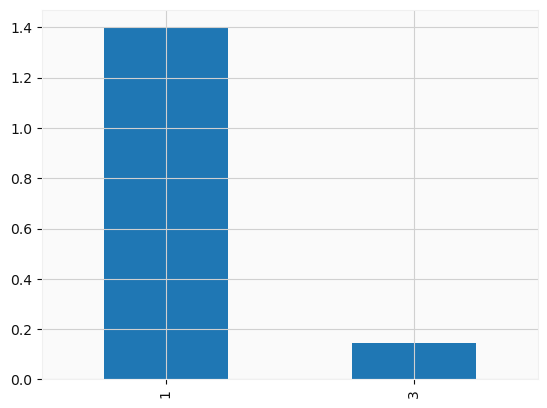

In [51]:
profit['return'].plot(kind='bar')